## 1. Generating two classes of random points in a 2D plane

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# generate two classes
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(  
    mean=[0, 3],   
    cov=[[1, 0.5],[0.5, 1]],   
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(  
    mean=[3, 0],   
    cov=[[1, 0.5],[0.5, 1]],  
    size=num_samples_per_class)

# stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples), dtype="float32")


# Generate the corresponding targets (0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
             np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

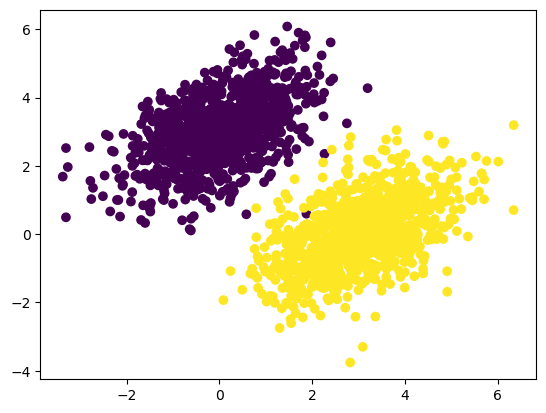

In [30]:
# Plot in matplotlib 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()


## 2.  Creating the linear classifier variables

In [31]:
# --- Layer Dimensions ---
input_dim = 2   # Number of input features
output_dim = 1  # Number of output neurons

# --- Trainable Parameters ---
# W: The weights matrix, initialized with random values to begin training.
# Its shape (2, 1) maps the inputs to the output.
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# b: The bias vector, initialized to zeros. It allows the model to shift its output.
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

print(W.shape)
print(b.shape)

(2, 1)
(1,)


## 3. The forward pass function

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 4. The mean sqaared error loss function

In [33]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   
    return tf.reduce_mean(per_sample_losses) # compute the mean of the loss

## 5. The training step function

In [34]:
# A hyperparameter that controls how large of a step to take during optimization.
learning_rate = 0.1

def training_step(inputs, targets):
    """Performs a single step of gradient descent to update the model's parameters."""
    
    # Use a GradientTape to "record" operations for automatic differentiation.
    with tf.GradientTape() as tape:
        # 1. Forward Pass: Feed inputs through the model to get predictions.
        predictions = model(inputs)
        # 2. Calculate the loss for this batch.
        loss = square_loss(predictions, targets)
        
    # 3. Backward Pass: Retrieve gradients of the loss with respect to W and b.
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    # 4. Gradient Descent: Update the model's parameters.
    # assign_sub() is a method in TensorFlow that subtracts a value from a variable 
    # and assigns the result back to the original variable.
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    # Return the loss for this step, which is useful for monitoring.
    return loss

## 6. The batch train loop

In [37]:
print(inputs)
print(targets)

[[ 0.93595508  3.54156248]
 [ 0.32049502  2.42586856]
 [-0.42750498  1.87238864]
 ...
 [ 2.77258032 -0.67416565]
 [ 2.91209193  0.60185187]
 [ 1.51046671 -1.33447198]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [39]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5059
Loss at step 1: 0.3195
Loss at step 2: 0.1414
Loss at step 3: 0.1174
Loss at step 4: 0.1079
Loss at step 5: 0.1004
Loss at step 6: 0.0937
Loss at step 7: 0.0875
Loss at step 8: 0.0820
Loss at step 9: 0.0769
Loss at step 10: 0.0722
Loss at step 11: 0.0680
Loss at step 12: 0.0642
Loss at step 13: 0.0607
Loss at step 14: 0.0575
Loss at step 15: 0.0546
Loss at step 16: 0.0519
Loss at step 17: 0.0495
Loss at step 18: 0.0473
Loss at step 19: 0.0453
Loss at step 20: 0.0435
Loss at step 21: 0.0418
Loss at step 22: 0.0403
Loss at step 23: 0.0389
Loss at step 24: 0.0376
Loss at step 25: 0.0365
Loss at step 26: 0.0354
Loss at step 27: 0.0345
Loss at step 28: 0.0336
Loss at step 29: 0.0328
Loss at step 30: 0.0321
Loss at step 31: 0.0315
Loss at step 32: 0.0309
Loss at step 33: 0.0303
Loss at step 34: 0.0298
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0286
Loss at step 38: 0.0283
Loss at step 39: 0.0279


In [48]:
# The fitted value

print(W.numpy())
print(b.numpy())

[[ 0.1813946]
 [-0.1221352]]
[0.3839661]


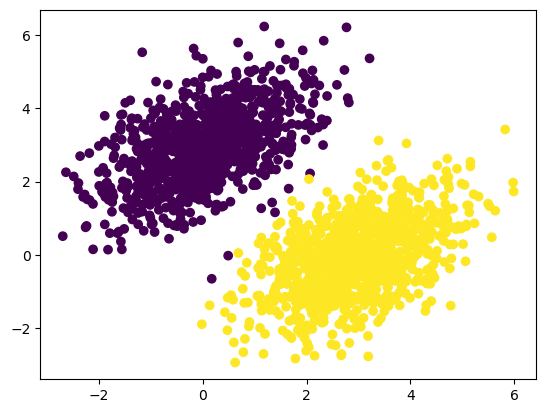

In [47]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

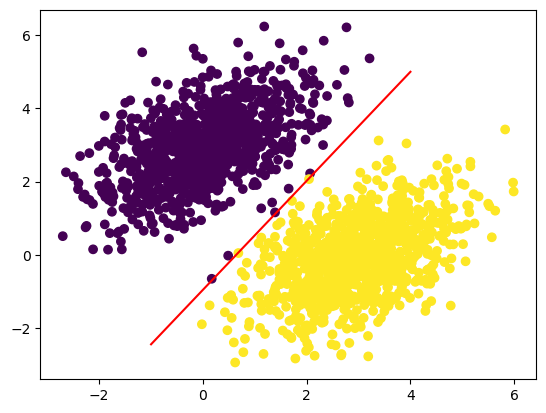

In [ ]:
# Draw the boundary
x = np.linspace(-1, 4, 100)   
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]  
plt.plot(x, y, "-r")           
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)